In [1]:
import pandas as pd
import numpy as np
import uts
import time

Train Data

In [2]:
import os
# assign directory
directory = 'data/training'

frames = []

# iterate over files in the directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        df = pd.read_csv(f)
        df["filename"] = filename       
        
        frames.append(df)

df_res = pd.concat(frames)

df_res.shape  # old (26002, 8) -> new (26011, 10)
        

(26011, 10)

In [9]:
dfau = pd.read_csv('data/training/AustralianUnity.csv')
gdf = dfau.groupby(['ProjectName'])

In [10]:
df.groupby(['ProjectName'])['ProjectName'].count()

ProjectName
CommunicationGateway     95
Energy                  377
SmartDocHub             224
Workflow                193
Name: ProjectName, dtype: int64

In [ ]:
# need to investigate
# role = df_res.loc[df_res['FormName'] == 'Role']
# role.to_csv("result/role.csv")


In [ ]:
df_res

ProjectId           ProjectName  FormId                FormName  \
0            1               Finance       1           ScheduledTask   
1            1               Finance       1           ScheduledTask   
2            1               Finance       1           ScheduledTask   
3            1               Finance       1           ScheduledTask   
4            1               Finance       1           ScheduledTask   
..         ...                   ...     ...                     ...   
884          4  CommunicationGateway     130  AieosTeamsNotification   
885          4  CommunicationGateway     130  AieosTeamsNotification   
886          4  CommunicationGateway     130  AieosTeamsNotification   
887          4  CommunicationGateway     130  AieosTeamsNotification   
888          4  CommunicationGateway     131          AieosChatReply   

                                 FormGuid  FormElementId      FormElementName  \
0    21791E70-A6F5-4E19-A90A-A2FEA9DF9273              1                 Name   
1    21791E70-A6F5-4E19-A90A-A2FEA9DF9273              2           Recurrence   
2    21791E70-A6F5-4E19-A90A-A2FEA9DF9273              3                 Task   
3    21791E70-A6F5-4E19-A90A-A2FEA9DF9273              4           Parameters   
4    21791E70-A6F5-4E19-A90A-A2FEA9DF9273              5               Active   
..                                    ...            ...                  ...   
884  FF946F87-710D-4A65-B41D-CEE599C0A766            679                 User   
885  FF946F87-710D-4A65-B41D-CEE599C0A766            680  AieosTeamsWebhookId   
886  FF946F87-710D-4A65-B41D-CEE599C0A766            667           GetMessage   
887  FF946F87-710D-4A65-B41D-CEE599C0A766            668              Message   
888  0833FB48-D8F7-4E94-AD0F-573685D4E30F            682                 Name   

          TableColumnMap             filename  
0                   Name  AustralianUnity.csv  
1             Recurrence  AustralianUnity.csv  
2                   Task  AustralianUnity.csv  
3             Parameters  AustralianUnity.csv  
4                 Active  AustralianUnity.csv  
..                   ...                  ...  
884                 User      VistaEnergy.csv  
885  AieosTeamsWebhookId      VistaEnergy.csv  
886                  NaN      VistaEnergy.csv  
887              Message      VistaEnergy.csv  
888                 Name      VistaEnergy.csv  

[26002 rows x 9 columns]

In [3]:

# todo
# [ActiveDirectoryGroup] -> [Active Directory Group]
# -> [Active, Directory, Group]

def process_data_new(df):

    uts.load_wordsegment()
    for index, row in df.iterrows():        
        df.loc[index,'FormElementName'] = uts.split_wordsegment(row['FormElementName'])
        
    df = df.applymap(str)
    
    gdf = df.groupby(['FormGuid','ProjectName'])
    gdf = gdf[['ProjectName', 'filename', 'FormName', 'FormGuid', 'FormElementName']]
    
    # Grouping one form -> one row of dataframe
    #gdf = df.groupby(['FormGuid','filename'])
    
    return gdf


s = time.time()

gdf = process_data_new(df_res)

e = time.time()
print("took: ", e-s)

ValueError: max() arg is an empty sequence

In [5]:
####testing

df = df_res

# uts.load_wordsegment()
# for index, row in df.iterrows():
    
#     df.loc[index,'FormElementName'] = uts.split_wordsegment(row['FormElementName'])
    
# df = df.applymap(str)

# gdf = df.groupby(['FormGuid','ProjectName'])
# gdf = gdf[['ProjectName', 'filename', 'FormName', 'FormGuid', 'FormElementName']]

uts.process_data_new(df)



In [ ]:
# gdf.get_group('0788AF26-CF87-46F5-A1E4-6A9D2F89442E') #'21791E70-A6F5-4E19-A90A-A2FEA9DF9273'

#gdf.get_group(('0788AF26-CF87-46F5-A1E4-6A9D2F89442E', 'CoreEnergy')) #'21791E70-A6F5-4E19-A90A-A2FEA9DF9273'


gdf.get_group(('FF946F87-710D-4A65-B41D-CEE599C0A766', 'CommunicationGateway'))


ProjectName         filename                FormName  \
881  CommunicationGateway  VistaEnergy.csv  AieosTeamsNotification   
882  CommunicationGateway  VistaEnergy.csv  AieosTeamsNotification   
883  CommunicationGateway  VistaEnergy.csv  AieosTeamsNotification   
884  CommunicationGateway  VistaEnergy.csv  AieosTeamsNotification   
885  CommunicationGateway  VistaEnergy.csv  AieosTeamsNotification   
886  CommunicationGateway  VistaEnergy.csv  AieosTeamsNotification   
887  CommunicationGateway  VistaEnergy.csv  AieosTeamsNotification   

                                 FormGuid         FormElementName  
881  FF946F87-710D-4A65-B41D-CEE599C0A766         Subscription Id  
882  FF946F87-710D-4A65-B41D-CEE599C0A766                Resource  
883  FF946F87-710D-4A65-B41D-CEE599C0A766               Responded  
884  FF946F87-710D-4A65-B41D-CEE599C0A766                    User  
885  FF946F87-710D-4A65-B41D-CEE599C0A766  Aieos Teams Webhook Id  
886  FF946F87-710D-4A65-B41D-CEE599C0A766             Get Message  
887  FF946F87-710D-4A65-B41D-CEE599C0A766                 Message

Calculate Intersection Matrix

In [ ]:
#todo make a table name list e.g. ['CommunicationGateway VistaEnergy.csv	AieosTeamsNotification	FF946F87-710D-4A65-B41D-CEE599C0A766', '...']
#[id, projectname, filename, formaname, formGuid, {}]

tn = pd.DataFrame(gdf).loc[:,0]
tn

0       (000D65ED-1722-4545-A7A7-EF183E0FA01D, SmataCore)
1       (00120FE3-7E0A-4C3F-B23B-E9D45EC7D04A, CoreGas...
2          (00203963-EB64-441D-B61E-244D4ABE9DBD, CoreGL)
3       (002636EC-7741-45A3-86AB-EC472B3CA0D4, SmataCore)
4       (00484602-26D0-4A39-A5F1-EEDA1B2C1CD5, CoreGas...
                              ...                        
2595    (FFC76D21-F0D8-476D-ACBB-BD404C34800A, Compare...
2596    (FFC76D21-F0D8-476D-ACBB-BD404C34800A, CoreEne...
2597    (FFE9362C-B2D3-4B56-BA8D-3B5B533D252B, Compare...
2598    (FFE9362C-B2D3-4B56-BA8D-3B5B533D252B, CoreEne...
2599    (FFF4A042-95A0-40A9-8124-7664CFB16846, CoreGat...
Name: 0, Length: 2600, dtype: object

In [ ]:
# df to one set

def df_set_new(gdf):

    res = []

    for table_name, df in gdf:
        df = df.dropna()
        df = df[['FormElementName']]
  
        lst = df.values.tolist()
        
        flat_list = [item for sublist in lst for item in sublist]
             
        res.append(set(flat_list))

    return res

lst = df_set_new(gdf)
lst[:3]

[{'Account No',
  'Bpay Biller Code',
  'Bsb',
  'Claims Email',
  'Created At',
  'Default Description',
  'Default Gl Code Id',
  'Externable Id',
  'Externable Type',
  'External Contact Id',
  'External Id',
  'Name',
  'Organisation Id',
  'Payment Method',
  'Payments Email',
  'Phone Number',
  'Phone Number2',
  'Phone Number3',
  'Repair Maintenance Email',
  'Status',
  'Updated At'},
 {'Field', 'Jurisdiction Code', 'Role', 'Table'},
 {'Created At'}]

In [ ]:
s = time.time()

# create matrix
matrix = uts.create_inetrsection_matrix(lst)
#print(matrix.median())

matrix.set_axis(tn,axis=1, inplace=True)
matrix.rename(tn, inplace=True)
matrix.head()

# matrix to csv
matrix.to_csv('result/res_matrix_0.csv')

e = time.time()
print("took: ", e-s)



/tmp/ipykernel_3178/3032449808.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  matrix.set_axis(tn,axis=1, inplace=True)


took:  9.779968738555908


Matrix to tree

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio import Phylo

In [ ]:
ddf = pd.read_csv('result/res_matrix_0.csv',keep_default_na=False)

ddf = ddf.iloc[:,1:]

# making triangular shape
names = ddf.columns.tolist()
lst = ddf.values.tolist()
for idx, row in enumerate(lst):
    del row[idx+1:]

In [ ]:
s = time.time()

df = lst
dm = DistanceMatrix(names=names, matrix=df)
constructor = DistanceTreeConstructor()
upgmatree = constructor.upgma(dm)

#upgmatree.ladderize()  # Flip branches so deeper clades are displayed at top
#Phylo.draw_ascii(upgmatree)

e = time.time()
print("took: ", e-s)


took:  2707.0480568408966


In [ ]:
from Bio.Phylo import NewickIO

s = time.time()

with open('result/nwtree.txt', 'w') as file:
    fileNo = NewickIO.write([upgmatree],file)
    print(fileNo)

tree_text = ""
with open('result/nwtree.txt', 'r') as file:
    tree_text = file.read().replace('\n', '')
    
    
e = time.time()
print("took: ", e-s)


1
took:  0.034662485122680664


In [ ]:
import json

s = time.time()

dict = {
    "newick": tree_text
}
json_obj = json.dumps(dict, indent=4)

with open("d3treeview-app/src/tree.json","w") as outfile:
    outfile.write(json_obj)
    
e = time.time()
print("took: ", e-s)

took:  0.007031917572021484


took:  77.43953847885132


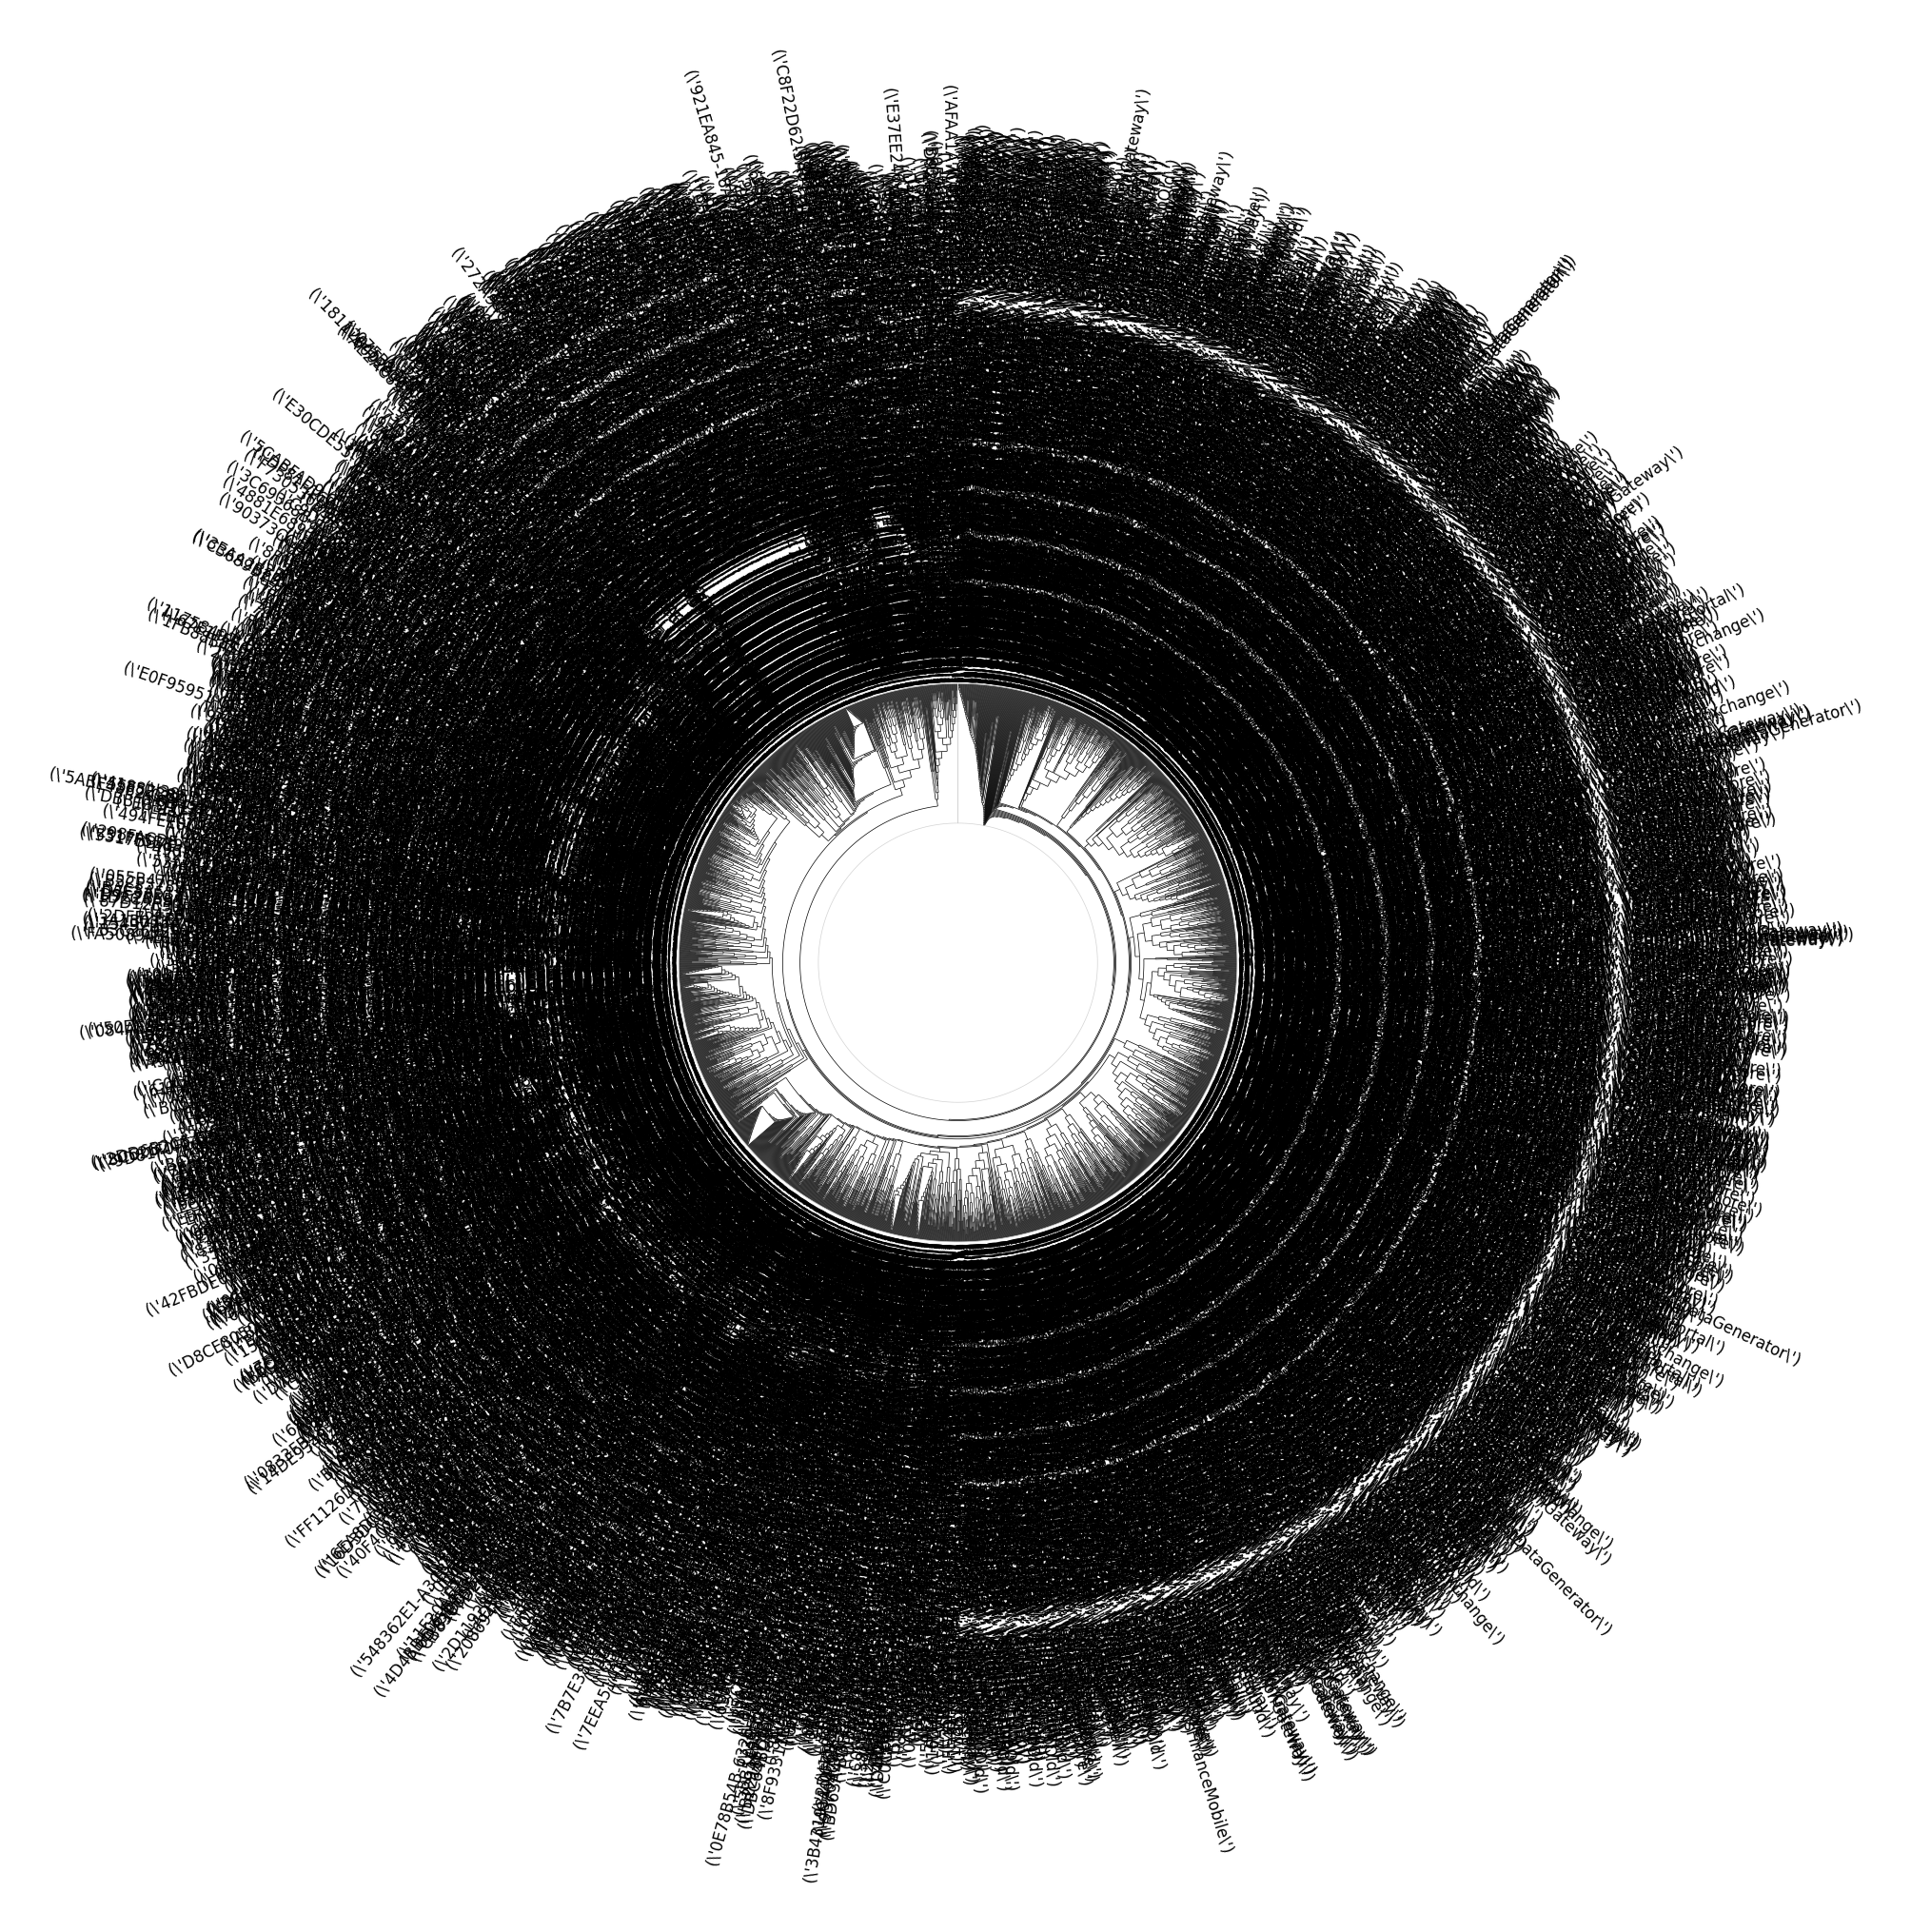

In [ ]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo

s = time.time()


# Load newick tree
tree = Phylo.read(StringIO(tree_text), "newick")

# Initialize circos sector by tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree
track = sector.add_track((50, 100))
track.axis(ec="lightgrey")
track.tree(tree, leaf_label_size=12)

fig = circos.plotfig()

e = time.time()
print("took: ", e-s)